# Study on Weights Distributions
Visualization for Aging Aware

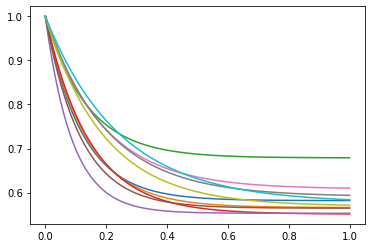

In [1]:
import pickle
import pNN_aging_aware as pnn
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import data
sys.path.append(os.path.join(os.getcwd(), 'Aging_Model'))
import torch
from torch.autograd import Variable
import training
import importlib

with open(os.path.join(os.getcwd(), 'Aging_Model', 'exp_aging_model.p'), 'rb') as f:
    age_generator = pickle.load(f)

models = age_generator.get_models(10)
t = np.linspace(0,1,100)
for model in models:
    plt.plot(t, model(t));

In [2]:
R = np.random.rand(4)
R.shape

(4,)

In [3]:
def aging(R, models, t):
    decays = np.array([model([t]) for model in models]).flatten()
    return R * decays

In [4]:
def getweights(R_aged):
    g = 1 / R_aged
    g = g / np.sum(g)
    W = g[:-2]
    return W

In [5]:
def showtrace(R, age_generator):
    models = age_generator.get_models(4)

    T = np.linspace(0,1,100)
    Ws = []
    for t in T:
        R_aged = aging(R, models, t)
        W = getweights(R_aged)
        Ws.append(W)
    Ws = np.array(Ws)
    w1 = Ws[:,0]
    w2 = Ws[:,1]
    
    return w1, w2

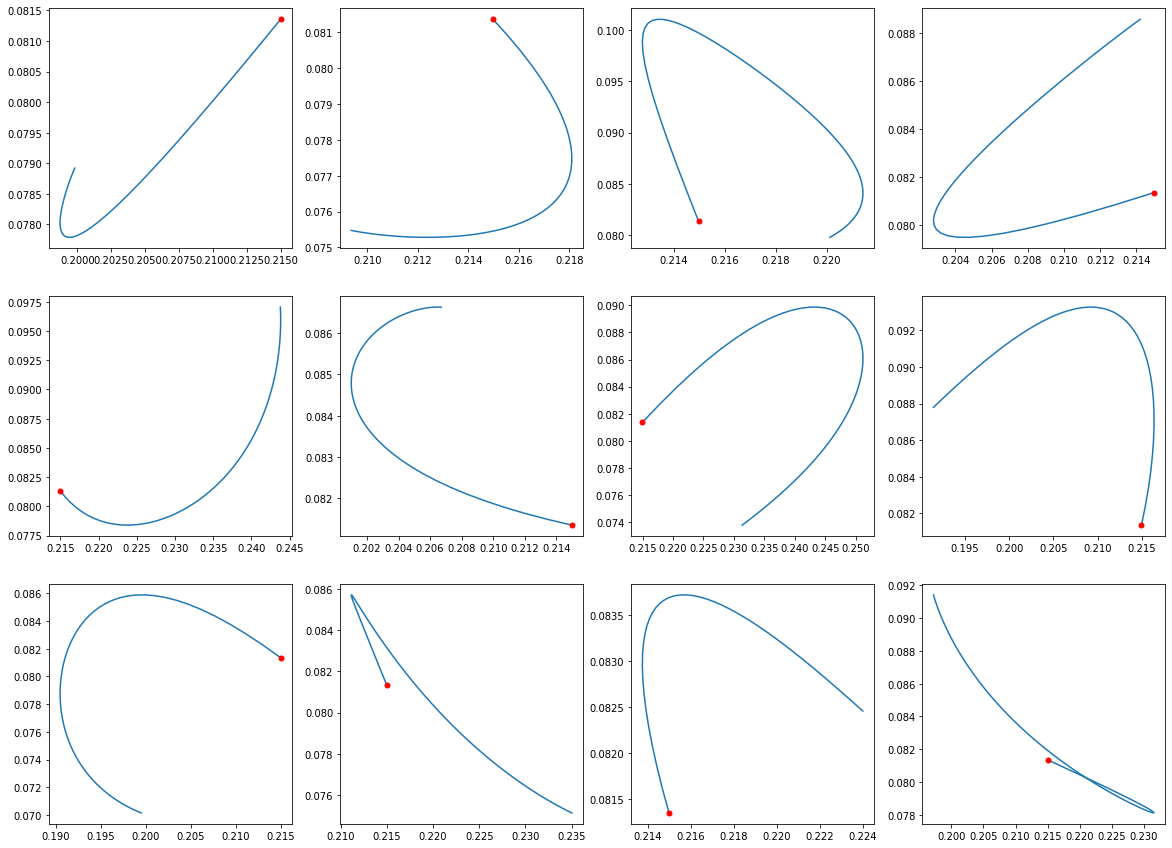

In [6]:
N, M = 3, 4
W0 = getweights(R)
fig, ax = plt.subplots(nrows = N, ncols = M, figsize=(20,20/M*N))
for i in range(M):
    for j in range(N):
        w1, w2 = showtrace(R, age_generator)
        ax[j,i].plot(w1,w2);
        ax[j,i].plot(W0[0],W0[1], '.', markersize=10, color='red');

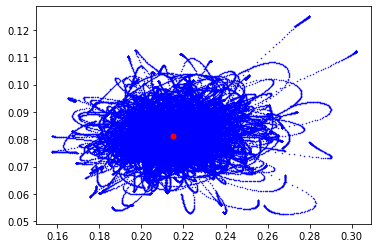

In [7]:
for i in range(1000):
    w1, w2 = showtrace(R, age_generator)
    plt.plot(w1,w2, '.', markersize=1, color='blue');

plt.plot(W0[0], W0[1], '.', markersize=10, color='red');